## Importing Packages and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import scipy.stats as stats

sns.set(color_codes=True)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Importing Dataset to Jupyter Notebooks

In [184]:
DataSet = pd.read_csv("D:\\McCombs Data Analytics Course\\Jupyter Notebook Files\\Proj 3 - Supervised Learning (Foundations)\\used_cars_data.csv")
Data = pd.read_csv("D:\\McCombs Data Analytics Course\\Jupyter Notebook Files\\Proj 3 - Supervised Learning (Foundations)\\used_cars_data.csv")

## Problem Definition
### CARS4U PROJECT

<u><b> OBJECTIVE </b></u>
- Explore and visualize the dataset.<br>
- Data Preprocessing. <br>
- Build a linear regression model to predict the prices of used cars.<br>
- Testing of Assumptions and Model Performance Evaluation of Linear Regression Model. <br>
- Generate a set of insights and recommendations that will help the business.<br>


## Basic Information on the Attributes in the Initial DataSet

<u><b> TYPES OF ATTRIBUTES </b></u>

In [7]:
DataSet.dtypes

S.No.                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

There are 9 attributes of type OBJECT (Strings). <br>
There are 3 attributes of type INTEGER. <br>
There are 2 attributes of type FLOAT. <br>
TOTAL : 14 Attributes. <br>

<u><b> ANY MISSING VALUES IN THE DATASET? </b></u>

In [8]:
DataSet.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

8 attributes have no missing values. <b>(S.No, Name, Location, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type)</b><br>
6 attributes have missing values. <b>(Mileage, Engine, Power, Seats, New_Price, Price)</b> <br>
These will be dealt with during Data Preprocessing.


<u><b> SUMMARIZED DATASET </b></u>

In [9]:
DataSet.describe(include="all")

S.No.                    Name Location         Year  \
count   7253.000000                    7253     7253  7253.000000   
unique          NaN                    2041       11          NaN   
top             NaN  Mahindra XUV500 W8 2WD   Mumbai          NaN   
freq            NaN                      55      949          NaN   
mean    3626.000000                     NaN      NaN  2013.365366   
std     2093.905084                     NaN      NaN     3.254421   
min        0.000000                     NaN      NaN  1996.000000   
25%     1813.000000                     NaN      NaN  2011.000000   
50%     3626.000000                     NaN      NaN  2014.000000   
75%     5439.000000                     NaN      NaN  2016.000000   
max     7252.000000                     NaN      NaN  2019.000000   

        Kilometers_Driven Fuel_Type Transmission Owner_Type    Mileage  \
count        7.253000e+03      7253         7253       7253       7251   
unique                NaN         5            2          4        450   
top                   NaN    Diesel       Manual      First  17.0 kmpl   
freq                  NaN      3852         5204       5952        207   
mean         5.869906e+04       NaN          NaN        NaN        NaN   
std          8.442772e+04       NaN          NaN        NaN        NaN   
min          1.710000e+02       NaN          NaN        NaN        NaN   
25%          3.400000e+04       NaN          NaN        NaN        NaN   
50%          5.341600e+04       NaN          NaN        NaN        NaN   
75%          7.300000e+04       NaN          NaN        NaN        NaN   
max          6.500000e+06       NaN          NaN        NaN        NaN   

         Engine   Power        Seats   New_Price        Price  
count      7207    7207  7200.000000        1006  6019.000000  
unique      150     386          NaN         625          NaN  
top     1197 CC  74 bhp          NaN  95.13 Lakh          NaN  
freq        732     280          NaN           6          NaN  
mean        NaN     NaN     5.279722         NaN     9.479468  
std         NaN     NaN     0.811660         NaN    11.187917  
min         NaN     NaN     0.000000         NaN     0.440000  
25%         NaN     NaN     5.000000         NaN     3.500000  
50%         NaN     NaN     5.000000         NaN     5.640000  
75%         NaN     NaN     5.000000         NaN     9.950000  
max         NaN     NaN    10.000000         NaN   160.000000

In [14]:
print("Unique Values of Name - ")
print(DataSet["Name"].unique())
print("Unique Values of Location - ")
print(DataSet["Location"].unique())
print("Unique Values of Fuel Type - ")
print(DataSet["Fuel_Type"].unique())
print("Unique Values of Transmission - ")
print(DataSet["Transmission"].unique())
print("Unique Values of Owner Type - ")
print(DataSet["Owner_Type"].unique())


Unique Values of Name - 
['Maruti Wagon R LXI CNG' 'Hyundai Creta 1.6 CRDi SX Option'
 'Honda Jazz V' ... 'Ford EcoSport 1.5 Petrol Ambiente'
 'Jeep Compass 1.4 Sport' 'Hyundai Elite i20 Magna Plus']
Unique Values of Location - 
['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
Unique Values of Fuel Type - 
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
Unique Values of Transmission - 
['Manual' 'Automatic']
Unique Values of Owner Type - 
['First' 'Second' 'Fourth & Above' 'Third']


##### Observations
- The DataSet contains information on 7253 people. <br>
- Year ranges from 1996 to 2019 with the average around 2013 <br>
- Kilometres_Driven ranges from 171 Km to 6500000 Km with the average around 58699 Km<br>
- Seats ranges from 0 to 10 with the average around 5 <br>
- Price ranges from Rs. 44000 to Rs. 1.6 Crore with the average around Rs. 9.5 Lakhs <br>
- There are Multiple Unique values in Name, Mileage, Engine, Power and New_Price. <br>
- Location has 11 Unique Values (Mumbai, Pune, Chennai, Coimbatore, Hyderabad, Jaipur, Kochi, Kolkata, Delhi, Bangalore, Ahemdabad) <br>
- Fuel_Type has 5 Unique Values (CNG, LPG, Petrol, Diesel, Electric) <br>
- Transmission has 2 Unique Values (Manual and Automatic) <br>
- Owner_Type has 4 Unique Values (First, Second, Third, Fourth and Above)<br>

<u><b> DIMENSIONS OF THE  DATASET (ROWS AND COLUMNS) </b></u>

In [15]:
DataSet.shape

(7253, 14)

There are 7253 rows and 14 columns

<u><b> CORRELATIONS BETWEEN ATTRIBUTES </b></u>

In [17]:
DataSet.corr()

S.No.      Year  Kilometers_Driven     Seats     Price
S.No.              1.000000  0.005573          -0.007697 -0.006720 -0.020275
Year               0.005573  1.000000          -0.187859  0.008216  0.305327
Kilometers_Driven -0.007697 -0.187859           1.000000  0.090221 -0.011493
Seats             -0.006720  0.008216           0.090221  1.000000  0.052225
Price             -0.020275  0.305327          -0.011493  0.052225  1.000000

<u><b> SKEWNESS IN THE DATASET </b></u>

In [18]:
DataSet.skew()

S.No.                 0.000000
Year                 -0.839816
Kilometers_Driven    61.582575
Seats                 1.902262
Price                 3.335232
dtype: float64

- Year has negative skew
- Kilometres_driven has a very high Positive Skew

## Data Pre-Processing I
<b> This part of Data Preprocessing is done to understand the DataSet better and for UNIVARIATE and BIVARIATE Exploratory Data Analysis. <br>Further Data Preprocessing will be done after EDA is complete. <br></b>

In [185]:
df = Data

#### STEP 1 : DROP UNNECESSARY COLUMNS
In this case; 
- <b>S.No.</b> column will not be used to make any deductions. Hence it shall be dropped. 
- The <b>New_Price</b> column has too many missing values; that cannot be filled in with medians or averages. The values are also given for very specific cars which cannot be applied for other cars from the same brand. Hence it shall be dropped. 

In [186]:
df.drop(['S.No.','New_Price'],axis=1, inplace=True)
df.shape

(7253, 12)

The Number of columns has now reduced to 12. 

#### STEP 2 : PROCESSING COLUMNS
1) <b>Mileage</b> is of type object. Since it is inherently a numerical value (distance travelled per litre/kg of fuel); the kmpl and km/kg units can be removed and the column can be converted into float values.<br>
2) <b>Engine</b> is of type object. Since it is inherently a numerical value (Displacement Volume of Engine); the CC unit can be removed and the column can be converted into float values.<br>
3) <b>Power</b> is of type object. Since it is inherently a numerical value (Maximum HorsePower of the Engine); the bhp unit can be removed and the column can be converted into float values. <br>

<b>1) MILEAGE</b>

In [189]:
df['Mileage'] = df['Mileage'].str.replace(" kmpl","")
df['Mileage'] = df['Mileage'].str.replace(" km/kg","")
df['Mileage'] = df['Mileage'].astype(float, errors = 'raise')
df.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Mileage   Engine      Power  Seats  Price  
0       CNG       Manual      First    26.60   998 CC  58.16 bhp    5.0   1.75  
1    Diesel       Manual      First    19.67  1582 CC  126.2 bhp    5.0  12.50  
2    Petrol       Manual      First    18.20  1199 CC   88.7 bhp    5.0   4.50  
3    Diesel       Manual      First    20.77  1248 CC  88.76 bhp    7.0   6.00  
4    Diesel    Automatic     Second    15.20  1968 CC  140.8 bhp    5.0  17.74

<b>2) ENGINE</b>

In [190]:
df['Engine'] = df['Engine'].str.replace(" CC","")
df['Engine'] = df['Engine'].astype(float, errors = 'raise')
df.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Mileage  Engine      Power  Seats  Price  
0       CNG       Manual      First    26.60   998.0  58.16 bhp    5.0   1.75  
1    Diesel       Manual      First    19.67  1582.0  126.2 bhp    5.0  12.50  
2    Petrol       Manual      First    18.20  1199.0   88.7 bhp    5.0   4.50  
3    Diesel       Manual      First    20.77  1248.0  88.76 bhp    7.0   6.00  
4    Diesel    Automatic     Second    15.20  1968.0  140.8 bhp    5.0  17.74

<b>3) POWER</b>

Some values for the attribute 'Power' have been entered as "null bhp". These values have to be converted into NaN values for easy Data Processing. 

In [200]:
df['Power'] = df['Power'].str.replace("null","NaN")


In [203]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
Price                1234
dtype: int64

As a result; the null values for 'Power' have now increased from 46 to 175.

In [201]:
df['Power'] = df['Power'].str.replace(" bhp","")
df['Power'] = df['Power'].astype(float, errors = 'raise')
df.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats  Price  
0       CNG       Manual      First    26.60   998.0   58.16    5.0   1.75  
1    Diesel       Manual      First    19.67  1582.0  126.20    5.0  12.50  
2    Petrol       Manual      First    18.20  1199.0   88.70    5.0   4.50  
3    Diesel       Manual      First    20.77  1248.0   88.76    7.0   6.00  
4    Diesel    Automatic     Second    15.20  1968.0  140.80    5.0  17.74

## Basic Information on the Attributes AFTER Data Preprocessing I

<u><b> TYPES OF ATTRIBUTES </b></u>

In [208]:
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

There are 5 attributes of type OBJECT (Strings). <br>
There are 2 attributes of type INTEGER. <br>
There are 5 attributes of type FLOAT. <br>
TOTAL : 12 Attributes. <br>

<u><b> ANY MISSING VALUES IN THE DATASET? </b></u>

In [209]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
Price                1234
dtype: int64

7 attributes have no missing values. <b>(Name, Location, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type)</b><br>
5 attributes have missing values. <b>(Mileage, Engine, Power, Seats, Price)</b> <br>
Missing Values in Power has gone up from 46 to 175.<br>

In [210]:
df.describe()

Year  Kilometers_Driven      Mileage       Engine        Power  \
count  7253.000000       7.253000e+03  7251.000000  7207.000000  7078.000000   
mean   2013.365366       5.869906e+04    18.141580  1616.573470   112.765214   
std       3.254421       8.442772e+04     4.562197   595.285137    53.493553   
min    1996.000000       1.710000e+02     0.000000    72.000000    34.200000   
25%    2011.000000       3.400000e+04    15.170000  1198.000000    75.000000   
50%    2014.000000       5.341600e+04    18.160000  1493.000000    94.000000   
75%    2016.000000       7.300000e+04    21.100000  1968.000000   138.100000   
max    2019.000000       6.500000e+06    33.540000  5998.000000   616.000000   

             Seats        Price  
count  7200.000000  6019.000000  
mean      5.279722     9.479468  
std       0.811660    11.187917  
min       0.000000     0.440000  
25%       5.000000     3.500000  
50%       5.000000     5.640000  
75%       5.000000     9.950000  
max      10.000000   160.000000

##### Addiotional Observations (After Data Preprocessing)

- Mileage ranges from 0 to 34 with the average around 18 <br>
- Engine ranges from 72 CC to 5998 CC with the average around 1616 CC <br>
- Power ranges from 34 bhp to 616 bhp with the average around 112.8 bhp<br>


<u><b> DIMENSIONS OF THE  DATASET (ROWS AND COLUMNS) </b></u>

In [211]:
df.shape

(7253, 12)

There are 7253 rows and 12 columns

<u><b> CORRELATIONS BETWEEN ATTRIBUTES </b></u>

In [212]:
df.corr()

Year  Kilometers_Driven   Mileage    Engine     Power  \
Year               1.000000          -0.187859  0.322463 -0.054693  0.013432   
Kilometers_Driven -0.187859           1.000000 -0.069122  0.094818  0.030164   
Mileage            0.322463          -0.069122  1.000000 -0.593569 -0.531771   
Engine            -0.054693           0.094818 -0.593569  1.000000  0.859771   
Power              0.013432           0.030164 -0.531771  0.859771  1.000000   
Seats              0.008216           0.090221 -0.310632  0.399262  0.095905   
Price              0.305327          -0.011493 -0.306593  0.658354  0.772566   

                      Seats     Price  
Year               0.008216  0.305327  
Kilometers_Driven  0.090221 -0.011493  
Mileage           -0.310632 -0.306593  
Engine             0.399262  0.658354  
Power              0.095905  0.772566  
Seats              1.000000  0.052225  
Price              0.052225  1.000000

<u><b> SKEWNESS IN THE DATASET </b></u>

In [213]:
df.skew()

Year                 -0.839816
Kilometers_Driven    61.582575
Mileage              -0.438321
Engine                1.412413
Power                 1.961178
Seats                 1.902262
Price                 3.335232
dtype: float64

- Year has negative skew
- Kilometres_driven has a very high Positive Skew
- Engine and Power both have a Positive Skew.
- Mileage has a small Negative Skew

## Univariate Analysis of Variables

<u><b> HISTOGRAM PLOT OF NUMERICAL VARIABLES TO SHOW DISTRIBUTION </b></u>

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Kilometers_Driven'}>,
        <AxesSubplot:title={'center':'Mileage'}>],
       [<AxesSubplot:title={'center':'Engine'}>,
        <AxesSubplot:title={'center':'Power'}>,
        <AxesSubplot:title={'center':'Seats'}>],
       [<AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

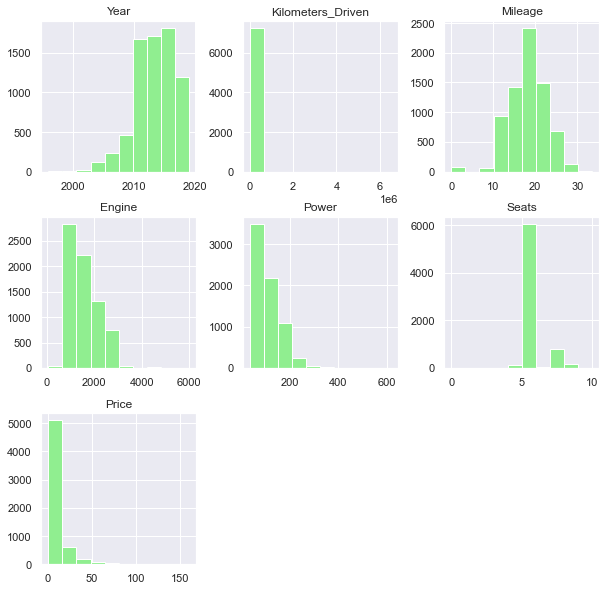

In [214]:
df.hist(figsize=(10,10), color = 'lightgreen')

Histogram Plots of the various numerical Attributes present in the given Dataset. It shows the frequency of each element within the attribute. <br>
##### Observations
- The Skew in the attribute Year, Kilometers_Driven and Price is clearly visible. <br>
- Most cars have 5 - 6 seats. <br>
- Skew can also be notes in Engine and Power pretty clearly <br>

<u><b> YEAR DISTRIBUTION </b></u>

<AxesSubplot:xlabel='Year'>

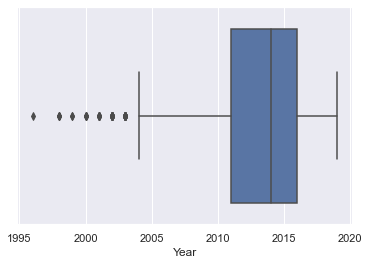

In [23]:
sns.boxplot(DataSet['Year'])

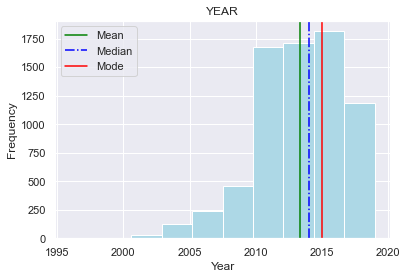

In [24]:
plt.hist(DataSet['Year'], color = 'lightblue')
plt.axvline(DataSet['Year'].mean(), color = 'green', label = 'Mean')
plt.axvline(DataSet['Year'].median(), color = 'blue', label = 'Median', linestyle = 'dashdot')
plt.axvline(DataSet['Year'].mode()[0], color = 'red', label = 'Mode')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title("YEAR")
plt.legend()

##### Observations
- Mode > Median > Mean --> NEGATIVELY SKEWED
- The DataSet has a higher concentration of people preferring cars made from 2010 to 2019.
- There are also outliers present.

<u><b> KILOMETERS DRIVEN DISTRIBUTION </b></u>

<AxesSubplot:xlabel='Kilometers_Driven'>

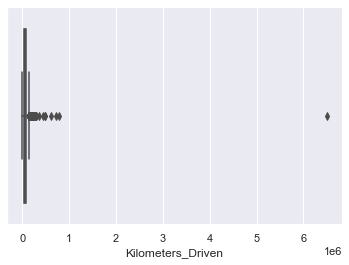

In [25]:
sns.boxplot(DataSet['Kilometers_Driven'])

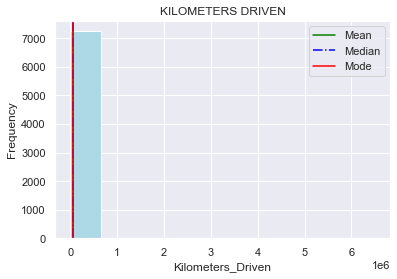

In [26]:
plt.hist(DataSet['Kilometers_Driven'], color = 'lightblue')
plt.axvline(DataSet['Kilometers_Driven'].mean(), color = 'green', label = 'Mean')
plt.axvline(DataSet['Kilometers_Driven'].median(), color = 'blue', label = 'Median', linestyle = 'dashdot')
plt.axvline(DataSet['Kilometers_Driven'].mode()[0], color = 'red', label = 'Mode')
plt.xlabel('Kilometers_Driven')
plt.ylabel('Frequency')
plt.title("KILOMETERS DRIVEN")
plt.legend()

##### Observations
- Mode < Median < Mean --> POSITIVELY SKEWED
- There are also outliers present.


<u><b> SEATS DISTRIBUTION </b></u>

<AxesSubplot:xlabel='Seats'>

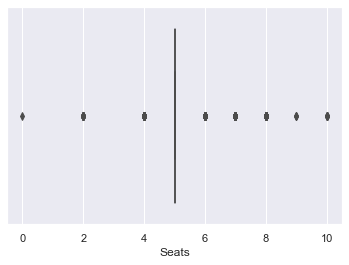

In [27]:
sns.boxplot(DataSet['Seats'])

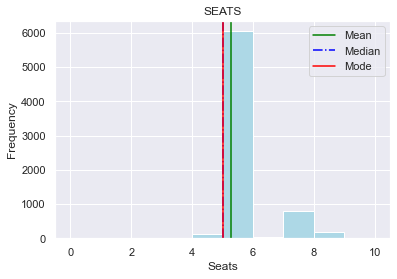

In [28]:
plt.hist(DataSet['Seats'], color = 'lightblue')
plt.axvline(DataSet['Seats'].mean(), color = 'green', label = 'Mean')
plt.axvline(DataSet['Seats'].median(), color = 'blue', label = 'Median', linestyle = 'dashdot')
plt.axvline(DataSet['Seats'].mode()[0], color = 'red', label = 'Mode')
plt.xlabel('Seats')
plt.ylabel('Frequency')
plt.title("SEATS")
plt.legend()

##### Observations
- Mode = Median = 5 Seats
- Most people prefer cars with 5 seats.
- Mean > Median : Small Postive Skew
- Outliers Present

<u><b> PRICE DISTRIBUTION </b></u>

<AxesSubplot:xlabel='Price'>

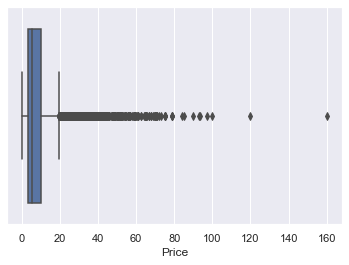

In [29]:
sns.boxplot(DataSet['Price'])

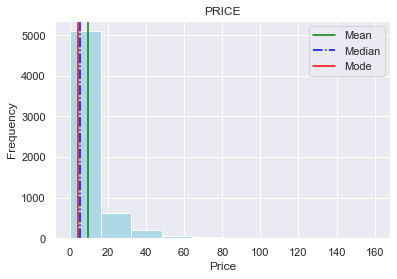

In [30]:
plt.hist(DataSet['Price'], color = 'lightblue')
plt.axvline(DataSet['Price'].mean(), color = 'green', label = 'Mean')
plt.axvline(DataSet['Price'].median(), color = 'blue', label = 'Median', linestyle = 'dashdot')
plt.axvline(DataSet['Price'].mode()[0], color = 'red', label = 'Mode')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title("PRICE")
plt.legend()

##### Observations
- Mode < Median < Mean --> POSITIVELY SKEWED
- Majority prefer cars in the price range Rs. 0 - 20 lakh
- Outliers Present. 

<u><b> MILEAGE DISTRIBUTION </b></u>

<AxesSubplot:xlabel='Mileage'>

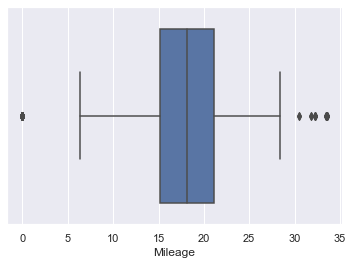

In [215]:
sns.boxplot(df['Mileage'])

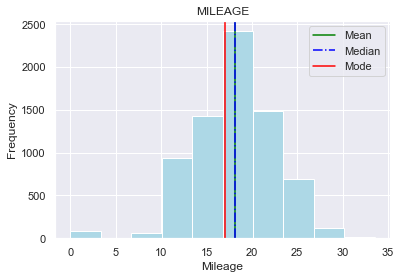

In [216]:
plt.hist(df['Mileage'], color = 'lightblue')
plt.axvline(df['Mileage'].mean(), color = 'green', label = 'Mean')
plt.axvline(df['Mileage'].median(), color = 'blue', label = 'Median', linestyle = 'dashdot')
plt.axvline(df['Mileage'].mode()[0], color = 'red', label = 'Mode')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.title("MILEAGE")
plt.legend()

##### Observations
- Mean = Median
- Normally Distributed (Very Small Skew)
- Most cars have mileage ranging from 13 to 23.
- Outliers Present. 

<u><b> ENGINE DISTRIBUTION </b></u>

<AxesSubplot:xlabel='Engine'>

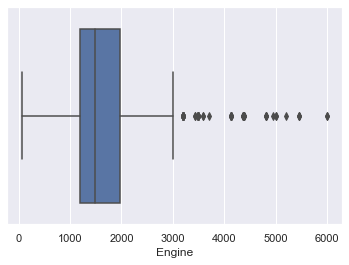

In [217]:
sns.boxplot(df['Engine'])

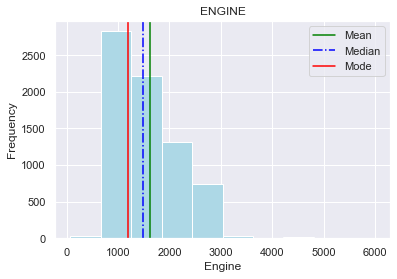

In [219]:
plt.hist(df['Engine'], color = 'lightblue')
plt.axvline(df['Engine'].mean(), color = 'green', label = 'Mean')
plt.axvline(df['Engine'].median(), color = 'blue', label = 'Median', linestyle = 'dashdot')
plt.axvline(df['Engine'].mode()[0], color = 'red', label = 'Mode')
plt.xlabel('Engine')
plt.ylabel('Frequency')
plt.title("ENGINE")
plt.legend()

##### Observations
- Mode < Median < Mean
- Slight Postive Skew
- Most cars have 500 to 2000 CC Engine
- Outliers Present. 

<u><b> POWER DISTRIBUTION </b></u>

<AxesSubplot:xlabel='Power'>

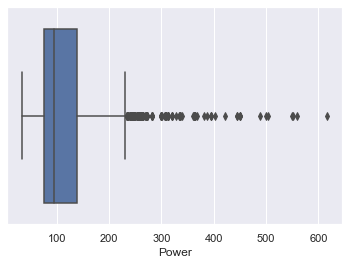

In [220]:
sns.boxplot(df['Power'])

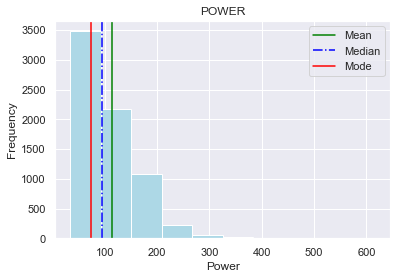

In [222]:
plt.hist(df['Power'], color = 'lightblue')
plt.axvline(df['Power'].mean(), color = 'green', label = 'Mean')
plt.axvline(df['Power'].median(), color = 'blue', label = 'Median', linestyle = 'dashdot')
plt.axvline(df['Power'].mode()[0], color = 'red', label = 'Mode')
plt.xlabel('Power')
plt.ylabel('Frequency')
plt.title("POWER")
plt.legend()

##### Observations
- Mode < Median < Mean
- Slight Postive Skew
- Most cars have 0 to 150 bhp
- Outliers Present. 

<u><b> LOCATION DISTRIBUTION </b></u>

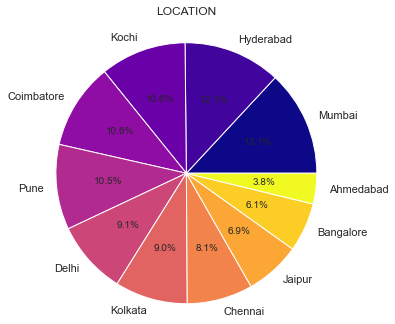

In [60]:
df2 = DataSet['Location'].value_counts()
df2.plot.pie(cmap = 'plasma', autopct='%2.1f%%',radius=1.5)
plt.title("LOCATION",y=1.2)
plt.show()

##### Observations
- Mumbai is the most frequently appearing city with Ahemdabad as least with a difference of approximately 10% between them.
- Kochi, Coimbatore and Pune come 2nd averaging at 10.5%
- Delhi and Kolkata come 3rd averaging at 9%
- Chennai is 4th with 8%
- Jaipur and Bangalore at 5th averaging at 6.5%

<u><b> FUEL TYPE DISTRIBUTION </b></u>

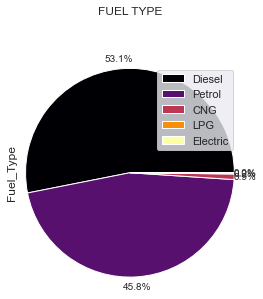

In [98]:
df3 = DataSet['Fuel_Type'].value_counts()
labels3 = ['Diesel','Petrol','CNG','LPG','Electric']
df3.plot.pie(cmap = 'inferno', autopct='%2.1f%%', pctdistance = 1.1, labels=None,radius = 1.2)
plt.title("FUEL TYPE",y=1.2)
plt.legend(labels3,loc = "upper right")


##### Observations
- Diesel is the most preferred at 53% followed by Petrol at 46%.
- They make up most of the dataset with CNG, LPG and Electric having negligible values.

<u><b> TRANSMISSION DISTRIBUTION </b></u>

<AxesSubplot:ylabel='Transmission'>

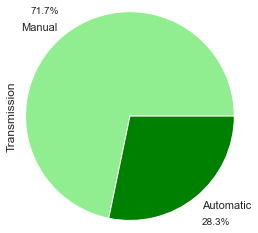

In [99]:
df4 = DataSet['Transmission'].value_counts()
clr4 = ['lightgreen','green']
df4.plot.pie(colors = clr3, autopct='%2.1f%%', pctdistance = 1.3,radius = 1.2)

##### Observations
- Manual Transmission is most preferred at 72% with Automatic at 2nd with 28%

<u><b> OWNER TYPE DISTRIBUTION </b></u>

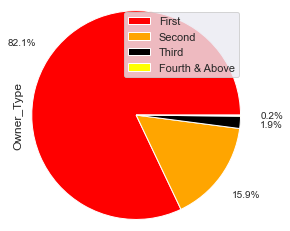

In [110]:
df5 = DataSet['Owner_Type'].value_counts()
clr5 = ['red','orange','black','yellow']
labels5 = ['First','Second','Third','Fourth & Above','Electric']
df5.plot.pie(colors=clr5, autopct='%2.1f%%', pctdistance = 1.3,radius = 1.2,labels=None)
plt.legend(labels5,loc = "upper right")

##### Observations
- Most people are the First Owners of the car accounting for 82% of the DataSet.
- Second Owners come 2nd at 16%.
- Very few people are Third, Fourth and so on Owners with them taking negligible values in the DataSet. 

## Bivariate Analysis of Variables

<u><b> HEAT MAP SHOWING CORRELATION BETWEEN VARIABLES </b></u>

<AxesSubplot:>

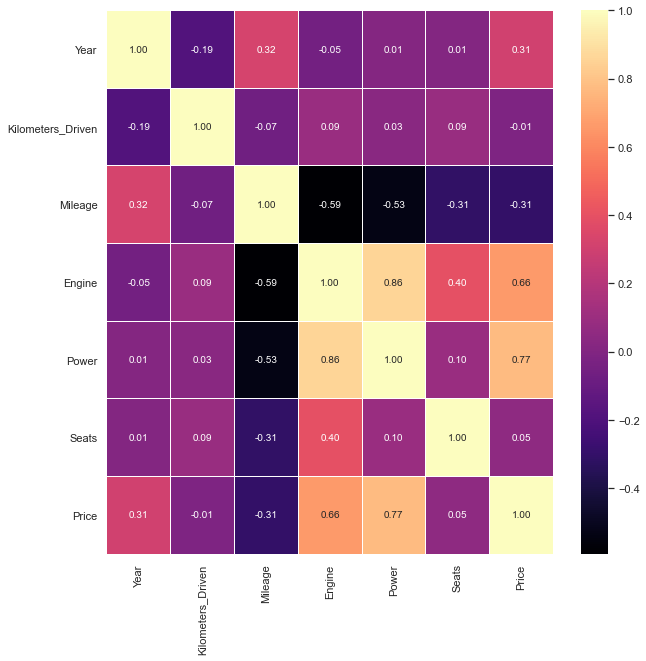

In [223]:
fig, ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), ax=ax, annot = True, linewidths = 0.05, fmt = '.2f', cmap="magma")

##### Observations
This Heat Map shows the correlation between the individual attributes. With this we can draw the following inferences : 
1) There is distributed correlation between the attributes of this dataset. <br>
2) The Highest Correlation is between 'Engine' and 'Power' with 0.86.<br>
3) The Lowest Correlation is between 'Engine' and 'Mileage' with -0.59 (Negative).<br>
4) Engine, Power and Price show strong dependency amongst each other. <br>
5) Mileage has negative correlation with most attributes. <br>


<u><b> PAIRPLOT BETWEEN VARIABLES </b></u>

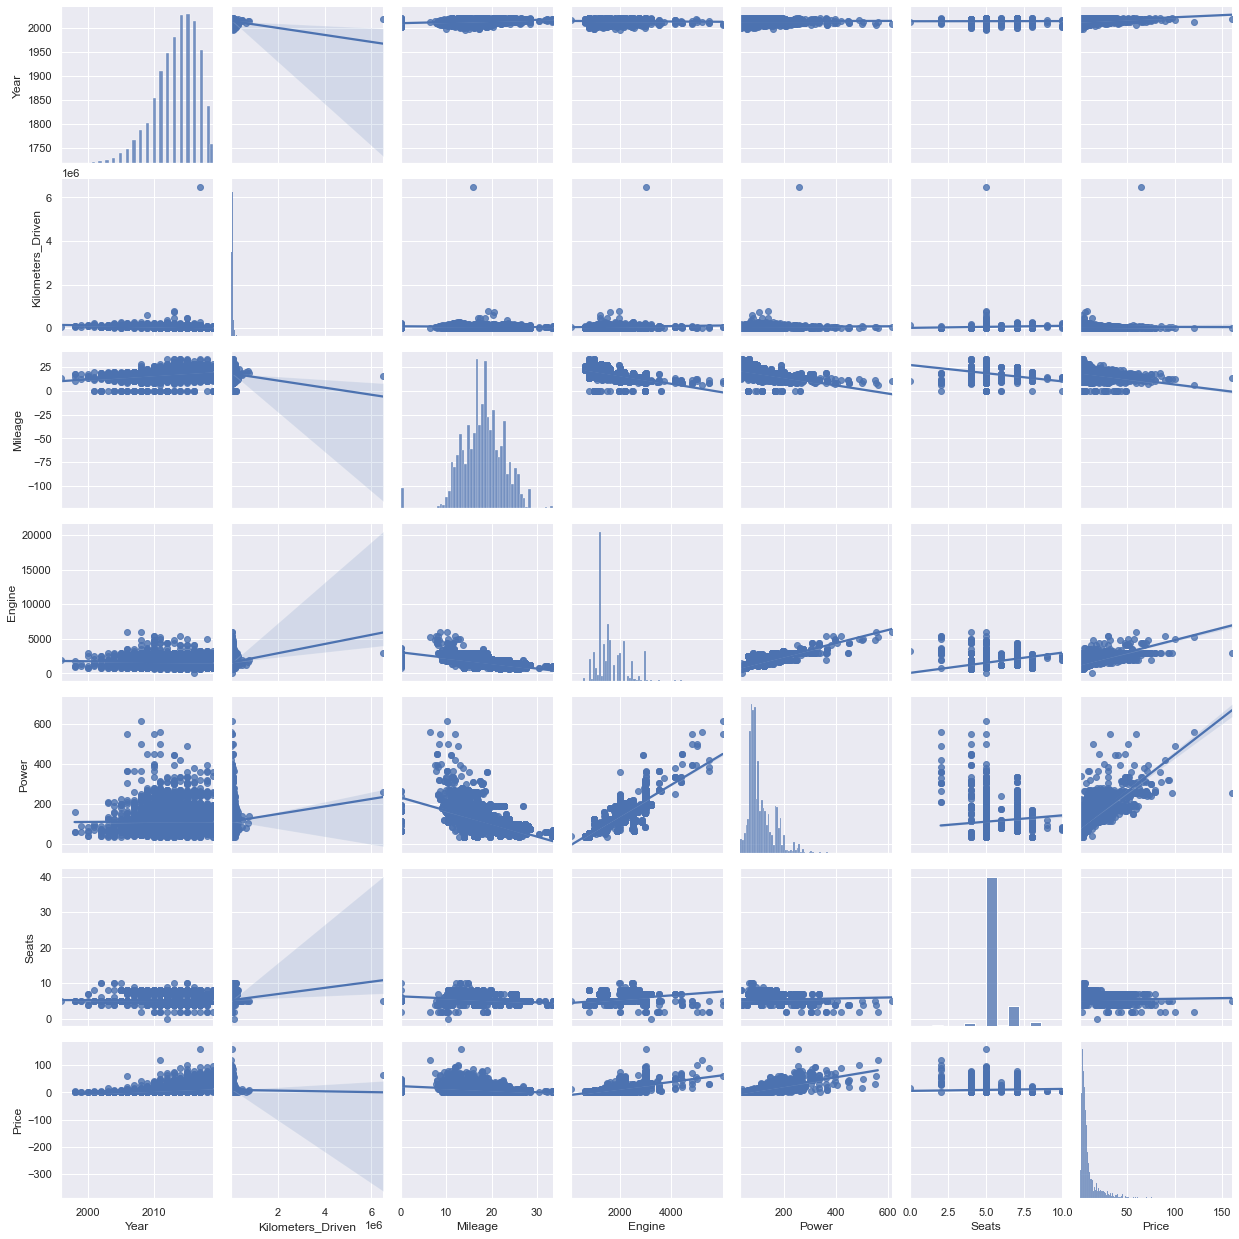

In [226]:
sns.pairplot(df,kind = 'reg')

##### Observations
Pairplot to show the relationship between the different variables. It is a more graphical representation of the Correlation Heat Map. 

<u><b> TRANSMISSION V/S FUEL TYPE </b></u>

<Figure size 720x432 with 0 Axes>

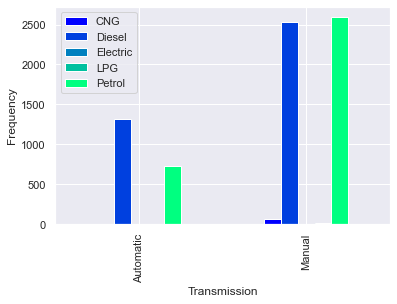

In [245]:
fig = plt.figure(figsize = (10,6))
tab1 = pd.crosstab(df['Transmission'],DataSet['Fuel_Type'])
tab1.plot.bar(cmap = "winter")
plt.ylabel("Frequency")
plt.legend(loc = "upper left")

##### Observations
- Manual Transmission is more preferred than Automatic
- CNG driven cars are only available in Manual Transmission
- LPG and Electric cars are too few in number to be visible on the graph

<u><b> FUEL TYPE V/S OWNER TYPE  </b></u>

<Figure size 720x432 with 0 Axes>

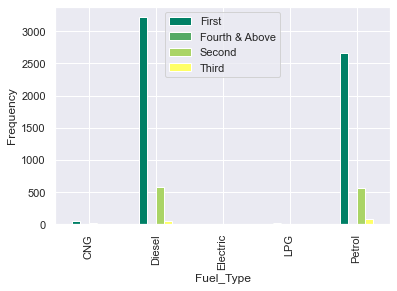

In [254]:
fig = plt.figure(figsize = (10,6))
tab2 = pd.crosstab(df['Fuel_Type'],DataSet['Owner_Type'])
tab2.plot.bar(cmap = "summer")
plt.ylabel("Frequency")
plt.legend(loc = "upper center")

##### Observations
- Most people prefer Diesel or Petrol Cars. 
- People prefer being the first owners of the cars that they buy

<u><b> LOCATION V/S TRANSMISSION </b></u>

Text(0, 0.5, 'Frequency')

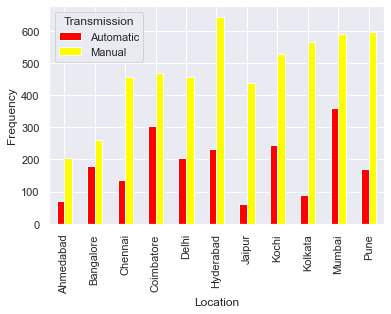

In [255]:
tab3 = pd.crosstab(df['Location'],DataSet['Transmission'])
tab3.plot.bar(cmap = "autumn")
plt.ylabel("Frequency")

##### Observations
- All cities prefer Manual over Automatic Transmission
- Hyderabad has the highest Manual Transmission cars
- Mumbai has the highest Automatic Transmission cars and also the highest number of cars in total.

<u><b> FUEL TYPE V/S YEAR </b></u>

<AxesSubplot:xlabel='Fuel_Type', ylabel='Year'>

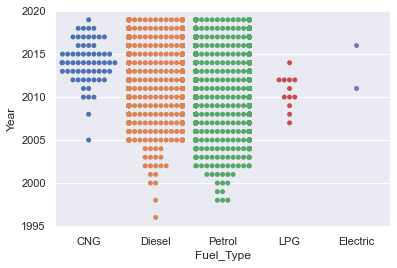

In [257]:
sns.swarmplot(df['Fuel_Type'],df['Year'])

##### Observations
- CNG, LPG and Electric cars are relatively newer; with manufacturing year ranging from 2008 to 2019
- Diesel Cars have the oldest manufacturing years then followed by Petrol Cars.

<u><b> YEAR V/S KILOMETERS DRIVEN </b></u>

<AxesSubplot:xlabel='Year', ylabel='Kilometers_Driven'>

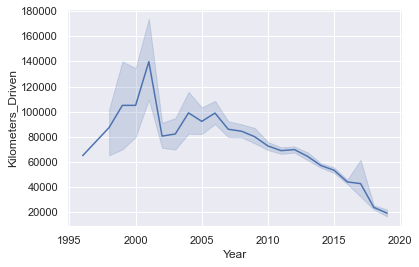

In [258]:
sns.lineplot(df['Year'],df['Kilometers_Driven'])

##### Observations
- As the years increase; the kilometers driven seems to decrease. Except for the sharp spike in 2001.
- This could be because of the fact that as the years progress; people prefer being the first owners of the car therefore cutting down on the kilometers driven by previosu owners. 

<u><b> MILEAGE V/S FUEL TYPE </b></u>

<AxesSubplot:xlabel='Fuel_Type', ylabel='Mileage'>

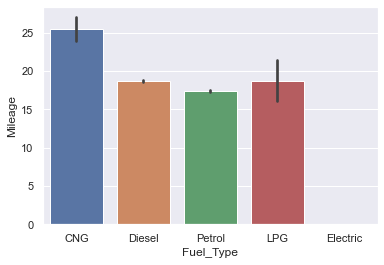

In [284]:
sns.barplot(y='Mileage',x='Fuel_Type',data=df)

##### Observations
- CNG cars give the most mileage followed by LPG, Diesel and then Petrol.
- Mileage value of electric cars is missing owing to the fact that it has no tangible source of fuel. Therefore consumption per km cannot be checked.

<u><b> ENGINE V/S FUEL TYPE </b></u>

<AxesSubplot:xlabel='Fuel_Type', ylabel='Engine'>

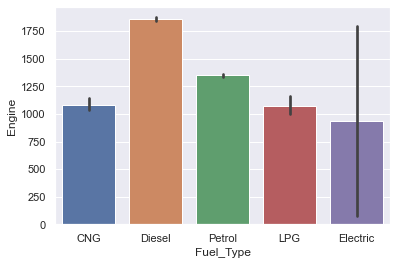

In [282]:
sns.barplot(y='Engine',x='Fuel_Type',data=df)

##### Observations
- Diesel cars have the most displacement volume of engine followed by Petrol, CNG, LPG and Electric. 

<u><b> PRICE V/S FUEL TYPE </b></u>

<AxesSubplot:xlabel='Fuel_Type', ylabel='Price'>

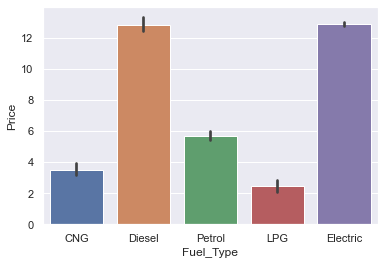

In [286]:
sns.barplot(y='Price',x='Fuel_Type',data=df)

##### Observations
- Electric cars are the most expensive cars followed by Diesel cars, Petrol, LPG and CNG. 

<u><b> TRANSMISSION V/S POWER </b></u>

Text(0.5, 1.0, 'Transmission v/s Power')

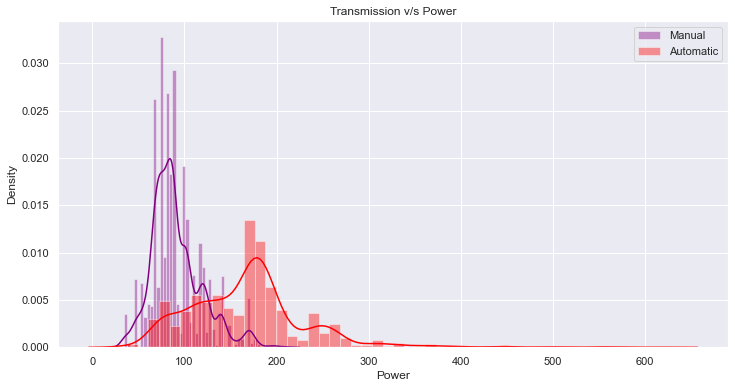

In [275]:
Manual = np.array(df[df['Transmission'] == 'Manual']['Power'])
Auto = np.array(df[df['Transmission'] == 'Automatic']['Power'])

fig = plt.figure(figsize = (12,6))
sns.distplot(Manual,color='purple',label='Manual')
sns.distplot(Auto,color='red',label='Automatic')
plt.legend()
plt.xlabel("Power")
plt.title("Transmission v/s Power")


##### Observations
- Automatic Transmission cars are displayed to have more power than the Manual Transmission Cars.

<u><b> TRANSMISSION V/S MILEAGE </b></u>

Text(0.5, 1.0, 'Transmission v/s Mileage')

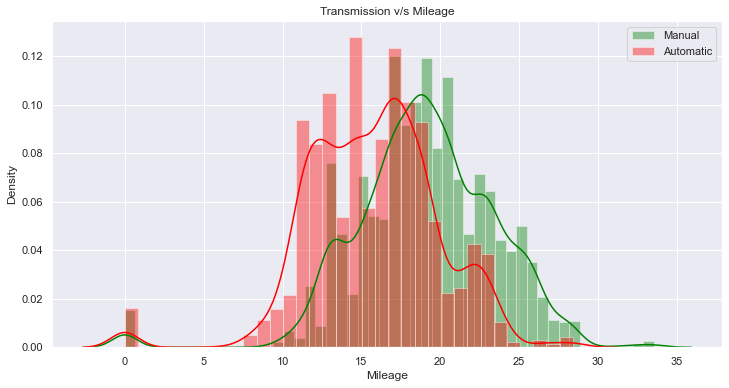

In [280]:
Manual_M = np.array(df[df['Transmission'] == 'Manual']['Mileage'])
Auto_M = np.array(df[df['Transmission'] == 'Automatic']['Mileage'])

fig = plt.figure(figsize = (12,6))
sns.distplot(Manual_M,color='green',label='Manual')
sns.distplot(Auto_M,color='red',label='Automatic')
plt.legend()
plt.xlabel("Mileage")
plt.title("Transmission v/s Mileage")


##### Observations
- Both being relatively normally distributed; Manual Cars give more Mileage than Automatic Ones.

<u><b> PRICE V/S SEATS </b></u>

<AxesSubplot:xlabel='Seats', ylabel='Price'>

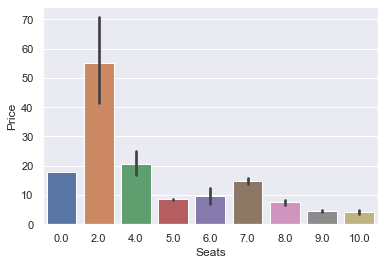

In [292]:
sns.barplot(y='Price',x='Seats',data=df)

##### Observations
- 2 seater cars are shown to be most expensive. Owing to the fact that they might be sports cars.
- It is followed by 4,0,7,6,5,8,9,10 seater cars in that order.

## Multivariate Analysis of Variables

<u><b> PRICE V/S LOCATIONS V/S TRANSMISSION </b></u>

[Text(0, 0, 'Mumbai'),
 Text(1, 0, 'Pune'),
 Text(2, 0, 'Chennai'),
 Text(3, 0, 'Coimbatore'),
 Text(4, 0, 'Hyderabad'),
 Text(5, 0, 'Jaipur'),
 Text(6, 0, 'Kochi'),
 Text(7, 0, 'Kolkata'),
 Text(8, 0, 'Delhi'),
 Text(9, 0, 'Bangalore'),
 Text(10, 0, 'Ahmedabad')]

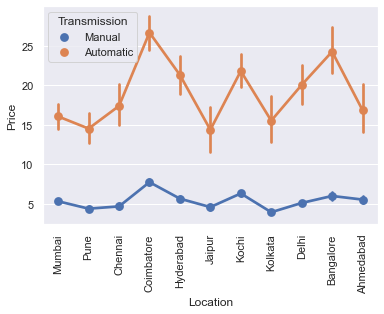

In [301]:
plot1 = sns.pointplot(df['Location'],df['Price'],hue = df['Transmission'])
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90, horizontalalignment='center')

##### Observations
- Manual Transmission cars are cheaper than Automatic Transmission cars. 
- Coimbatore, Hyderabad, Kochi and Bangalore a higher price range of cars than the other states for both Transmissions

<u><b> PRICE V/S OWNER TYPE V/S FUEL TYPE </b></u>

<AxesSubplot:xlabel='Owner_Type', ylabel='Price'>

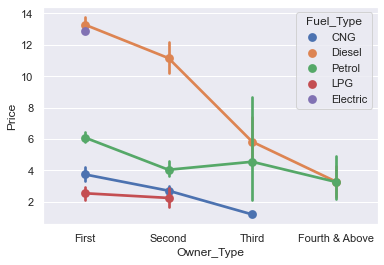

In [303]:
OwnOrd = ['First','Second','Third','Fourth & Above']
sns.pointplot(df['Owner_Type'],df['Price'],hue = df['Fuel_Type'], order = OwnOrd)

##### Observations
- Electric cars are not pre owned.
- As the number of previous owners increase; the price of the car falls.
- LPG cars have only First and Second Owners.
- CNG cars do not have 4 or more previous owners. 

<u><b> KILOMETERS DRIVEN V/S LOCATIONS V/S OWNER TYPE </b></u>

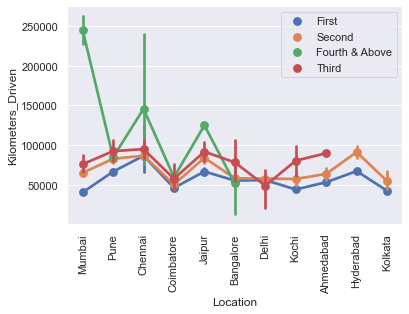

In [322]:
LocOrd = ['Mumbai','Pune','Chennai','Coimbatore','Jaipur','Bangalore','Delhi','Kochi','Ahmedabad','Hyderabad','Kolkata']
plot2 = sns.pointplot(df['Location'],df['Kilometers_Driven'],hue = df['Owner_Type'], order = LocOrd)
plot2.set_xticklabels(plot2.get_xticklabels(), rotation=90, horizontalalignment='center')
plt.legend(loc = "upper right")

##### Observations
- Kilometers Driven increases as the number of previous owners increases. 
- Four and More previously owned cars show very high values for Kilometers Driven.
- Kolkata and Hyderabad only have First and Second Owned Cars.
- Bangalore, Delhi, Kochi and Ahmedabad have First,Second and Third Owned cars.
- The other cities have all types of previously owned cars. 

<u><b> YEAR V/S FUEL TYPE V/S OWNER TYPE </b></u>

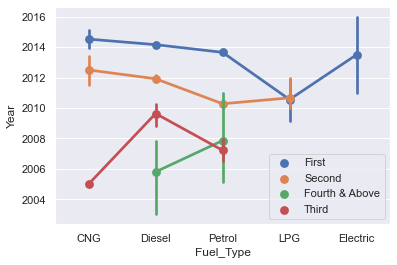

In [354]:
sns.pointplot(df['Fuel_Type'],df['Year'],hue = df['Owner_Type'])
plt.legend(loc = "lower right")

##### Observations
- As the number of previous owners increase; the manufacturing year of the car grows older. (Moves back)
- First Owned cars have latest manufacturing dates while fourth owned have older manufacturing dates.

<u><b> YEAR V/S LOCATIONS V/S TRANSMISSION </b></u>

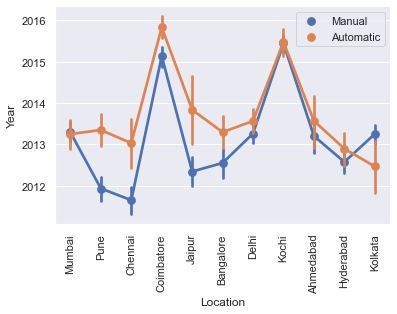

In [416]:
cut_bins =[1996, 2000, 2005, 2010, 2015, 2019]
cut_labels = ['1996-2000','2000-2005','2005-2010','2010-2015','2015-2019']
df['Year-Bin'] = pd.cut(df['Year'], bins=cut_bins, labels = cut_labels)
LocOrd = ['Mumbai','Pune','Chennai','Coimbatore','Jaipur','Bangalore','Delhi','Kochi','Ahmedabad','Hyderabad','Kolkata']
plot3 = sns.pointplot(df['Location'],df['Year'],hue = df['Transmission'], order = LocOrd)
plot3.set_xticklabels(plot3.get_xticklabels(), rotation=90, horizontalalignment='center')
plt.legend(loc = "upper right")

##### Observations
- Most cities have newer Automatic Transmission cars than Manual ones, expept for Kolkata where it is vice versa. 
- Coimbatore and Kochi have the latest cars for both Manual and Automatic transmission.


<u><b> SEATS V/S ENGINE V/S FUEL TYPE </b></u>

<Figure size 720x720 with 0 Axes>

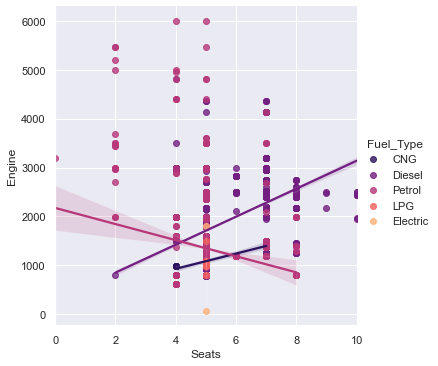

In [375]:
figure = plt.figure(figsize=(10,10))
sns.lmplot(x='Seats',y='Engine',hue = 'Fuel_Type',data=df, palette="magma")

##### Observations
- For CNG and Diesel cars; as the number of seats increase, the displacement volume of the engine increases as well.
- For Petrol; as the number of seats increase, the displacement volume of the engine decreases.
- LPG and Electric cars are mostly concentrated at 5 seats and hence trends for increasing or decreasing number of seats cannot be observed. 

<u><b> SEATS V/S POWER V/S OWNER TYPE </b></u>

<Figure size 720x720 with 0 Axes>

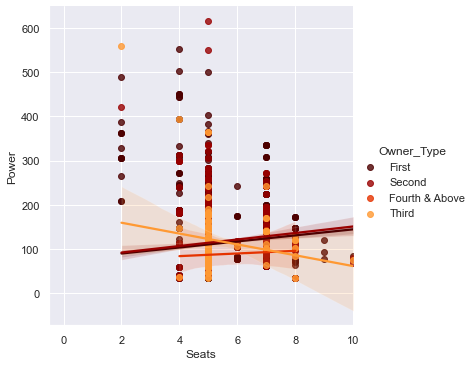

In [383]:
figure = plt.figure(figsize=(10,10))
sns.lmplot(x='Seats',y='Power',hue = 'Owner_Type',data=df, palette="gist_heat")

##### Observations
- First, Second and Four & Above owned cars show an increase in Power as the number of seats increase.
- Third owned cars show a decrease in Power and the number of seats increases.

<u><b> ENGINE V/S OWNER TYPE V/S TRANSMISSION </b></u>

<AxesSubplot:xlabel='Owner_Type', ylabel='Engine'>

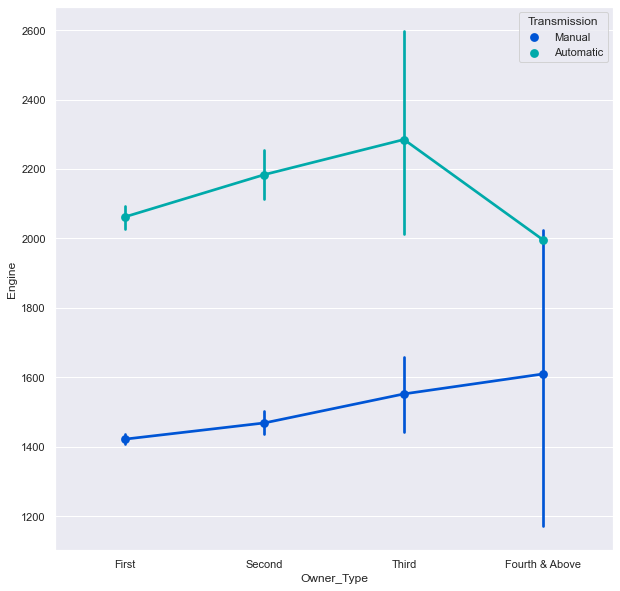

In [411]:
figure = plt.figure(figsize=(10,10))
OwnOrd = ['First','Second','Third','Fourth & Above']
sns.pointplot(y=df['Engine'],x=df['Owner_Type'],hue=df['Transmission'], palette = 'winter', order=OwnOrd)

##### Observations
- Automatic cars have a higher engine displacement volume than Manual Transmission cars. 
- For Manual Transmission, as number of owners increase; there is a rise in the Engine Displacement Volume.
- Automatic Transmission cars show similar trends; except when the car is owned 4 or more times, where the engine displacement volume is shown to decrease. 

<u><b> PANDAS AUTO GENERATED PROFILE FOR REFERENCE </b></u>

In [417]:
pandas_profiling.ProfileReport(df)

### Key Insights based on EDA
- People prefer cars manufactured from 2010 to 2019
- Most people prefer cars with 5 seats.
- Most preferred price range : 0 to 20 Lakhs.
- Mumbai appears most on the dataset and Ahmedabad the least (10% difference between them)
- Diesel cars are most preferred followed by Petrol. Other types have negligible values.
- Manual Transmission is most preferred at 72% with Automatic at 28%.
- Most people are first owners with the percentage rising as the years progress.
- Most cars have mileage ranging from 3 - 13
- Most cars have a 500 - 2000 CC Engine
- Most consistent Power range is 0 - 150 bhp
- Manual Transmission is more preferred than Automatic
- CNG driven cars are only available in Manual Transmission
- All cities prefer Manual over Automatic Transmission
- Hyderabad has the highest Manual Transmission cars
- Mumbai has the highest Automatic Transmission cars and also the highest number of cars in total.
- CNG, LPG and Electric cars are relatively newer; with manufacturing year ranging from 2008 to 2019
- Diesel Cars have the oldest manufacturing years then followed by Petrol Cars.
- As the years increase; the kilometers driven seems to decrease. Except for the sharp spike in 2001. (This could be because of the fact that as the years progress; people prefer being the first owners of the car therefore cutting down on the kilometers driven by previous owners.)
- CNG cars give the most mileage followed by LPG, Diesel and then Petrol.
- Diesel cars have the most displacement volume of engine followed by Petrol, CNG, LPG and Electric.
- Electric cars are the most expensive cars followed by Diesel cars, Petrol, LPG and CNG.
- Automatic Transmission cars are displayed to have more power than the Manual Transmission Cars.
- Both being relatively normally distributed; Manual Cars give more Mileage than Automatic Ones.
- 2 seater cars are shown to be most expensive. Owing to the fact that they might be sports cars.
- Manual Transmission cars are cheaper than Automatic Transmission cars.
- Coimbatore, Hyderabad, Kochi and Bangalore a higher price range of cars than the other states for both Transmissions
- Electric cars are not pre owned.
- As the number of previous owners increase; the price of the car falls.
- LPG cars have only First and Second Owners.
- CNG cars do not have 4 or more previous owners.
- Kilometers Driven increases as the number of previous owners increases.
- Four and More previously owned cars show very high values for Kilometers Driven.
- Kolkata and Hyderabad only have First and Second Owned Cars.
- Bangalore, Delhi, Kochi and Ahmedabad have First,Second and Third Owned cars.
- The other cities have all types of previously owned cars.
- As the number of previous owners increase; the manufacturing year of the car grows older. (Moves back)
- Most cities have newer Automatic Transmission cars than Manual ones, expept for Kolkata where it is vice versa.
- Coimbatore and Kochi have the latest cars for both Manual and Automatic transmission.
- For CNG and Diesel cars; as the number of seats increase, the displacement volume of the engine increases as well.
- For Petrol; as the number of seats increase, the displacement volume of the engine decreases.
- LPG and Electric cars are mostly concentrated at 5 seats and hence trends for increasing or decreasing number of seats cannot be observed.
- First, Second and Four & Above owned cars show an increase in Power as the number of seats increase.
- Third owned cars show a decrease in Power and the number of seats increases.
- Automatic cars have a higher engine displacement volume than Manual Transmission cars.
- For Manual Transmission, as number of owners increase; there is a rise in the Engine Displacement Volume.
- Automatic Transmission cars show similar trends; except when the car is owned 4 or more times, where the engine displacement volume is shown to decrease.

### Recommendations based on EDA
- Specific Marketing strategies catering to older cars focusing on the lower prices to sttract customers.
- Drawing more attention to cars with more seats by targetting audiences with bigger extended families living together. 
- Expensive cars like the Electric ones and 2 seater sports cars can be branded as luxury items and can attract customers. Also encourage customers to sell the car in a few years in favour of the new ones with more features.
- Focusing on Petrol and Diesel Prices for marketing strategies to ensure sales dont fall.
- Marketing Electric, LPG and CNG cars as ecofriendly. 
- Creating an easy to understand chart to explain which cars may be more suitable to which city terrain.
- Draw more attention to Automatic transmission cars by showing that they are easier to drive.
- As CNG cars give more mileage than any other type of car; draw customer attention to this fact to show them that they can save money.
- Specfic Marketing Strategies based on the Engine and Power output of the car. 


## Data Pre-Processing II
<b> This part of Data Preprocessing is done to cater to the Model Building part of the project. It will help in easier development of the Linear Regression Model <br></b>
<u>CONTINUATION</u>

#### STEP 3 : FIXING MISSING VALUES
Missing Values across the Numeric Columns are replaced with the median of the column 

In [424]:
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns] = df[numeric_columns].apply(medianFiller,axis=0)

In [431]:
df.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

#### STEP 4 : FIXING DATA TYPE
Conversion of Object Type Column to Category Type.  

In [432]:
df['Location'] = df['Location'].astype('category')
df['Fuel_Type'] = df['Fuel_Type'].astype('category')
df['Transmission'] = df['Transmission'].astype('category')
df['Owner_Type'] = df['Owner_Type'].astype('category')

In [434]:
df.dtypes

Name                   object
Location             category
Year                    int64
Kilometers_Driven       int64
Fuel_Type            category
Transmission         category
Owner_Type           category
Mileage               float64
Engine                float64
Power                 float64
Seats                 float64
Price                 float64
dtype: object

#### STEP 5 : OUTLIERS AND THEIR TREATMENT
Identifying the outliers in all columns and treating them <br>
<i> Using IQR to treat the outliers. </i>

In [442]:
def treat_outliers(df,col):
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)  
    return df

def treat_outliers_all(df, col_list):
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    

In [443]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df,numerical_col)

Plotting to see the change after the outliers have been treated.

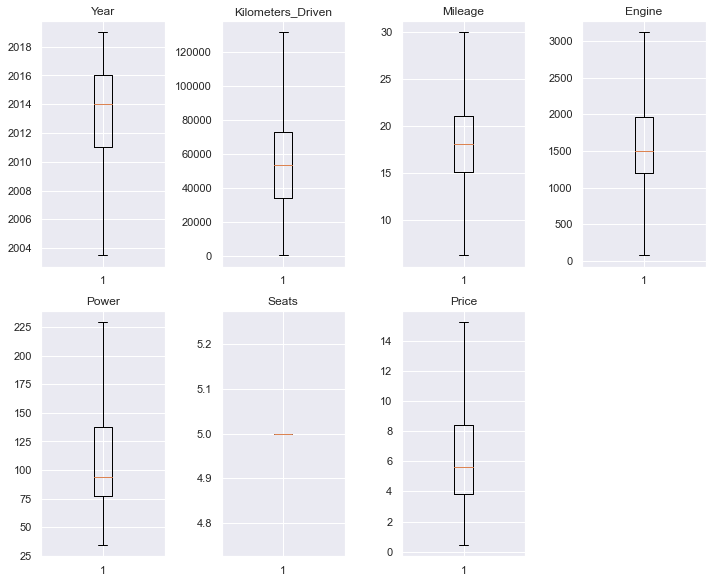

In [450]:
plt.figure(figsize=(10,20))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

Outliers have been treated. 

## Model Building
<b> Linear Regression Model Building to create a pricing model that can effectively predict the price of used cars. </b>

#### STEP 1 : IMPORTING LIBRARIES

In [466]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### STEP 2 : DEFINING X & Y VARIABLES

In [483]:
y = df[['Price']] #Dependent Variable
X = df.drop(['Name','Price'], axis=1) #Independent Variables


print(X.head())
print(y.head())

     Location    Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0      Mumbai  2010.0              72000       CNG       Manual      First   
1        Pune  2015.0              41000    Diesel       Manual      First   
2     Chennai  2011.0              46000    Petrol       Manual      First   
3     Chennai  2012.0              87000    Diesel       Manual      First   
4  Coimbatore  2013.0              40670    Diesel    Automatic     Second   

   Mileage  Engine   Power  Seats  
0    26.60   998.0   58.16    5.0  
1    19.67  1582.0  126.20    5.0  
2    18.20  1199.0   88.70    5.0  
3    20.77  1248.0   88.76    5.0  
4    15.20  1968.0  140.80    5.0  
    Price
0   1.750
1  12.500
2   4.500
3   6.000
4  15.225


In [484]:
X

Location    Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0         Mumbai  2010.0              72000       CNG       Manual      First   
1           Pune  2015.0              41000    Diesel       Manual      First   
2        Chennai  2011.0              46000    Petrol       Manual      First   
3        Chennai  2012.0              87000    Diesel       Manual      First   
4     Coimbatore  2013.0              40670    Diesel    Automatic     Second   
...          ...     ...                ...       ...          ...        ...   
7248   Hyderabad  2011.0              89411    Diesel       Manual      First   
7249      Mumbai  2015.0              59000    Petrol    Automatic      First   
7250     Kolkata  2012.0              28000    Diesel       Manual      First   
7251        Pune  2013.0              52262    Petrol    Automatic      Third   
7252       Kochi  2014.0              72443    Diesel    Automatic      First   

      Mileage  Engine   Power  Seats  
0       26.60   998.0   58.16    5.0  
1       19.67  1582.0  126.20    5.0  
2       18.20  1199.0   88.70    5.0  
3       20.77  1248.0   88.76    5.0  
4       15.20  1968.0  140.80    5.0  
...       ...     ...     ...    ...  
7248    20.54  1598.0  103.60    5.0  
7249    17.21  1197.0  103.60    5.0  
7250    23.08  1461.0   63.10    5.0  
7251    17.20  1197.0  103.60    5.0  
7252    10.00  2148.0  170.00    5.0  

[7253 rows x 10 columns]

In [485]:
y

Price
0      1.750
1     12.500
2      4.500
3      6.000
4     15.225
...      ...
7248   5.640
7249   5.640
7250   5.640
7251   5.640
7252   5.640

[7253 rows x 1 columns]

#### STEP 2 : CREATING DUMMY VARIABLES
The Categorical Columns in this dataset cannot be read by the equation pertaining to model building. <br>
So we create simple true or false columns with their titular equivalent and column value. These will be used as independent variables without imposing any kind of ordering between the values of that particular column. 

In this case; the Categorical Columns are : <br><i>1) Location <br>2) Fuel_Type<br>3) Transmission<br>4) Owner_Type<br> </i>

In [486]:
X = pd.get_dummies(X, columns=['Location', 'Fuel_Type','Owner_Type','Transmission'], drop_first=False)
X.head()

Year  Kilometers_Driven  Mileage  Engine   Power  Seats  \
0  2010.0              72000    26.60   998.0   58.16    5.0   
1  2015.0              41000    19.67  1582.0  126.20    5.0   
2  2011.0              46000    18.20  1199.0   88.70    5.0   
3  2012.0              87000    20.77  1248.0   88.76    5.0   
4  2013.0              40670    15.20  1968.0  140.80    5.0   

   Location_Ahmedabad  Location_Bangalore  Location_Chennai  \
0                   0                   0                 0   
1                   0                   0                 0   
2                   0                   0                 1   
3                   0                   0                 1   
4                   0                   0                 0   

   Location_Coimbatore  ...  Fuel_Type_Diesel  Fuel_Type_Electric  \
0                    0  ...                 0                   0   
1                    0  ...                 1                   0   
2                    0  ...                 0                   0   
3                    0  ...                 1                   0   
4                    1  ...                 1                   0   

   Fuel_Type_LPG  Fuel_Type_Petrol  Owner_Type_First  \
0              0                 0                 1   
1              0                 0                 1   
2              0                 1                 1   
3              0                 0                 1   
4              0                 0                 0   

   Owner_Type_Fourth & Above  Owner_Type_Second  Owner_Type_Third  \
0                          0                  0                 0   
1                          0                  0                 0   
2                          0                  0                 0   
3                          0                  0                 0   
4                          0                  1                 0   

   Transmission_Automatic  Transmission_Manual  
0                       0                    1  
1                       0                    1  
2                       0                    1  
3                       0                    1  
4                       1                    0  

[5 rows x 28 columns]

In [487]:
X.dtypes

Year                         float64
Kilometers_Driven              int64
Mileage                      float64
Engine                       float64
Power                        float64
Seats                        float64
Location_Ahmedabad             uint8
Location_Bangalore             uint8
Location_Chennai               uint8
Location_Coimbatore            uint8
Location_Delhi                 uint8
Location_Hyderabad             uint8
Location_Jaipur                uint8
Location_Kochi                 uint8
Location_Kolkata               uint8
Location_Mumbai                uint8
Location_Pune                  uint8
Fuel_Type_CNG                  uint8
Fuel_Type_Diesel               uint8
Fuel_Type_Electric             uint8
Fuel_Type_LPG                  uint8
Fuel_Type_Petrol               uint8
Owner_Type_First               uint8
Owner_Type_Fourth & Above      uint8
Owner_Type_Second              uint8
Owner_Type_Third               uint8
Transmission_Automatic         uint8
T

In [488]:
X.shape

(7253, 28)

The Data Frame X containing the independent variables now has 28 columns as opposed to the initial of 10 columns.

#### STEP 3 : SPLITTING THE DATA INTO TRAINING AND TESTING SET
- 70% Training Data Set
- 30% Testing Data Set

In [490]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<u>TRAINING DATASET</u>

In [500]:
X_train.shape

(5077, 28)

In [501]:
y_train.shape

(5077, 1)

<u>TESTING DATASET</u>

In [502]:
X_test.shape

(2176, 28)

In [497]:
y_test.shape

(2176, 1)

#### STEP 4 : MODEL BUILDING
Linear Regression Equation : y = aX + b<br>
where: <br>
y = Dependent Variable<br>
a = Intercept<br>
b = Slope<br>
X = Independent Variables<br>

<b><i>1) INTERCEPT or 'a' VALUE </i></b>

In [511]:
linearregression = LinearRegression()                                    
linearregression.fit(X_train, y_train)                                  

print("Intercept of the linear equation:", linearregression.intercept_) 



Intercept of the linear equation: [-819.8219374]


<b><i>2) COEFFICIENTS or SLOPE VALUE </i></b><br>
In simple or multiple linear regression, the size of the coefficient for each independent variable gives you the size of the effect that variable is having on your dependent variable, and the sign on the coefficient (positive or negative) gives you the direction of the effect. In regression with multiple independent variables, the coefficient tells you how much the dependent variable is expected to increase (if the coefficient is positive) or decrease (if the coefficient is negative) when that independent variable increases by one, holding all the other independent variables constant. 

In [557]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, linearregression.coef_[0][idx]))

The coefficient for Year is 0.40879779963848883
The coefficient for Kilometers_Driven is -1.045304873765375e-05
The coefficient for Mileage is -0.08977878224484184
The coefficient for Engine is 0.0009855126063751068
The coefficient for Power is 0.036627580178181685
The coefficient for Seats is 9.366951658762446e-13
The coefficient for Location_Ahmedabad is 0.05849649253841341
The coefficient for Location_Bangalore is 0.35249370890987153
The coefficient for Location_Chennai is 0.11630341981972431
The coefficient for Location_Coimbatore is 0.469580257537356
The coefficient for Location_Delhi is -0.21564162299846631
The coefficient for Location_Hyderabad is 0.4842451710290928
The coefficient for Location_Jaipur is 0.07213293696261694
The coefficient for Location_Kochi is -0.13430764983008867
The coefficient for Location_Kolkata is -0.9407866252394254
The coefficient for Location_Mumbai is -0.1754854538536489
The coefficient for Location_Pune is -0.08703063487159302
The coefficient for Fue

In [558]:
df_coef_chk = pd.DataFrame(columns = ['Attribute', 'Coef'])
for idx, col_name in enumerate(X_train.columns):
    df_coef_chk = df_coef_chk.append(pd.DataFrame({'Attribute': col_name, 'Coef': linearregression.coef_[0][idx]}, index=[0]), ignore_index=True)


In [559]:
df_coef_chk

Attribute          Coef
0                        Year  4.087978e-01
1           Kilometers_Driven -1.045305e-05
2                     Mileage -8.977878e-02
3                      Engine  9.855126e-04
4                       Power  3.662758e-02
5                       Seats  9.366952e-13
6          Location_Ahmedabad  5.849649e-02
7          Location_Bangalore  3.524937e-01
8            Location_Chennai  1.163034e-01
9         Location_Coimbatore  4.695803e-01
10             Location_Delhi -2.156416e-01
11         Location_Hyderabad  4.842452e-01
12            Location_Jaipur  7.213294e-02
13             Location_Kochi -1.343076e-01
14           Location_Kolkata -9.407866e-01
15            Location_Mumbai -1.754855e-01
16              Location_Pune -8.703063e-02
17              Fuel_Type_CNG -1.948736e-02
18           Fuel_Type_Diesel  8.314306e-01
19         Fuel_Type_Electric  9.992007e-16
20              Fuel_Type_LPG -2.722627e-01
21           Fuel_Type_Petrol -5.396805e-01
22           Owner_Type_First  2.772917e-01
23  Owner_Type_Fourth & Above -3.009942e-01
24          Owner_Type_Second  1.373514e-01
25           Owner_Type_Third -1.136488e-01
26     Transmission_Automatic  6.295152e-01
27        Transmission_Manual -6.295152e-01

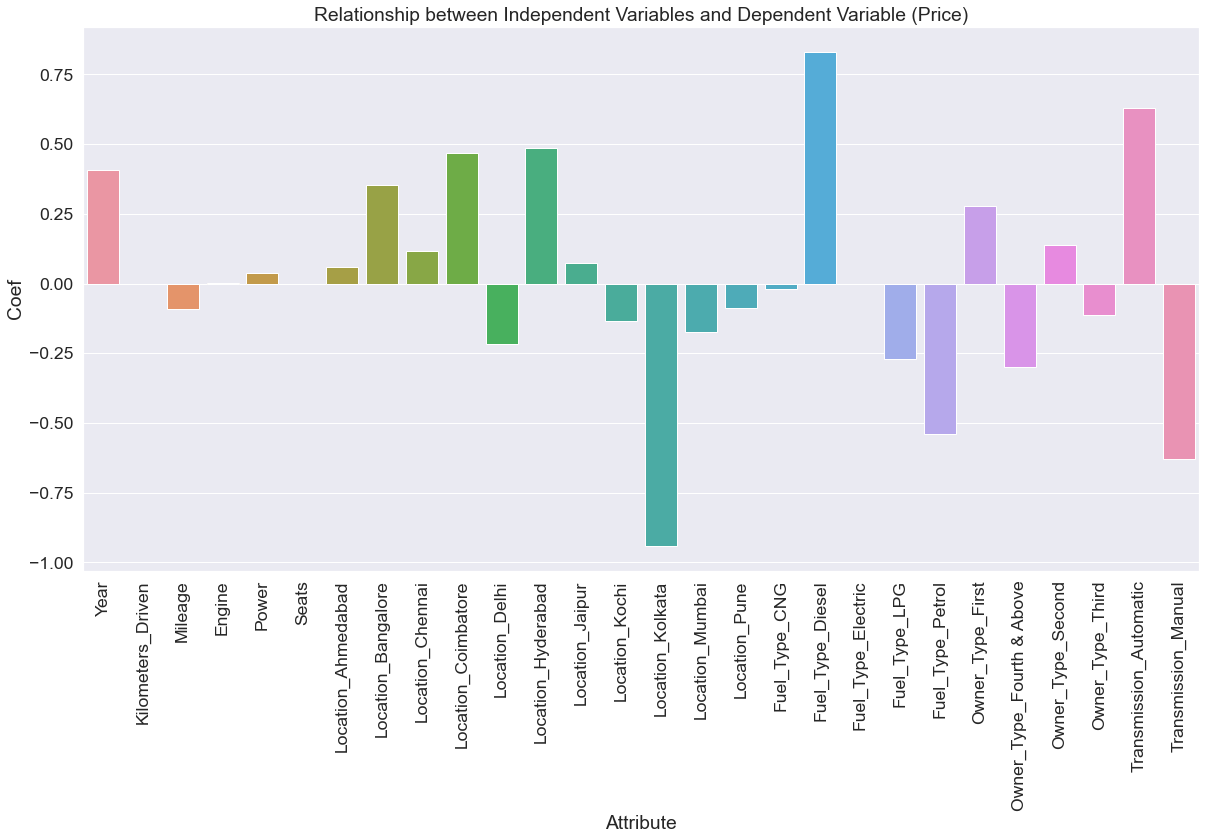

In [574]:
sns.set(rc={'figure.figsize':(20,10)},font_scale=1.6)
Coef_Check = sns.barplot(x='Attribute',y='Coef',data = df_coef_chk)
Coef_Check.set_xticklabels(Coef_Check.get_xticklabels(), rotation=90, horizontalalignment='center')
plt.title("Relationship between Independent Variables and Dependent Variable (Price)")
plt.show()

As understood from the graph. Few variables have a strong relationship with the price of the car. This relationship can either be Positive or Negative.<br>
- <b>SIGNIFICANT POSITIVE EFFECT : </b>Year, Location(Bangalore, Chennai), Fuel_Type(Diesel), Owner_Type(First), Automatic Transmission
- <b>SIGNIFICANT NEGATIVE EFFECT : </b>Location(Kolkata), Fuel_Type(LPG,Petrol), Owner_Type(Second), Manual Transmission

<b><i>3) $R^2$ VALUE </i></b><br>
It is a regression metric which tells us the amount of variance explained.<br>
Best possible score is 1.0, and it can be negative because the model can be arbitrarily worse.<br>
A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.<br>

- <u> Training Data Score </u>

In [509]:
linearregression.score(X_train, y_train)

0.6847420515999858

- <u> Testing Data Score</u>

In [513]:
linearregression.score(X_test, y_test)

0.715571624528472

$R^2$ value is 0.71, which means that in this model's independent variables are able to explain 71% of the variance in the dependent variable. Therefore; it is a satisfactory model.<br>
The training and testing scores are 68% and 71%, and both scores are comparable. Hence, the model is a good fit.<br>


#### STEP 4 : MODEL PERFORMANCE EVALUATION
Evaluate performance of model based on certain performance metrics

In [512]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred = linearregression.predict(X_test) 


1) <u>MEAN ABSOLUTE ERROR</u><br>
The mean absolute error (MAE) is the simplest regression error metric to understand. It calculates the residual for every data point, taking only the absolute value of each so that negative and positive residuals do not cancel out. Then it takes the average of all these residuals. Effectively, MAE describes the typical magnitude of the residuals.

In [516]:
mean_absolute_error(y_test, pred)

1.6333095620442801

Smaller MAE value is preferred. In our case; the MAE is quite decent as the dataset is quite large.

2) <u>ROOT MEAN SQUARED ERROR</u><br>
The root mean square error (RMSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. And then takes the square root of the value.

In [517]:
mean_squared_error(y_test, pred)**0.5

2.2839305825824274

Smaller RMSE value is preferred. In our case; the RMSE is quite decent as the dataset is quite large.

3) <u>$R^2$ VALUE </u><br>
It is a regression metric which tells us the amount of variance explained.<br>
Best possible score is 1.0, and it can be negative because the model can be arbitrarily worse.<br>
A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.<br>

$R^2$ value is 0.71, which means that in this model's independent variables are able to explain 71% of the variance in the dependent variable. Therefore; it is a satisfactory model.<br>
The training and testing scores are 68% and 71%, and both scores are comparable. Hence, the model is a good fit.<br>


All 3 performance evaluation values ($R^2$, MAE and RMSE) can be improved. $R^2$ can be increased by including more variable attributes. Efforts can be made to reduce the MAE and RMSE values as well

#### STEP 5 : ADDING INTERACTION TERMS (To increase the $R^2$ value)

In [577]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)


- <u> Training Data Score (After Addition of Interaction Terms)</u>

In [531]:
#In sample (training) R^2 will always improve with the number of variables!
r2_train2 = poly_clf.score(X_train2, y_train)
r2_train2

0.7120245156036937

- <u> Testing Data Score (After Addition of Interaction Terms)</u>

In [532]:
r2_test2 = poly_clf.score(X_test2, y_test)
r2_test2

0.7661134722908403

But this is at the cost of adding new interaction terms and therefore more variables. 

#### STEP 6 : FINAL EQUATION OF THE MODEL

In [576]:
# Let us write the equation of the fit
Equation = "Price ="
print(Equation, end='\t')
for i in range(0, 28):
    if(i!=27):
        print("(",df_coef_chk.iloc[i].Coef,")", "*", df_coef_chk.iloc[i].Attribute, "+", end = '  ')
    else:
        print(df_coef_chk.iloc[i].Coef)

Price =	( 0.40879779963848883 ) * Year +  ( -1.045304873765375e-05 ) * Kilometers_Driven +  ( -0.08977878224484184 ) * Mileage +  ( 0.0009855126063751068 ) * Engine +  ( 0.036627580178181685 ) * Power +  ( 9.366951658762446e-13 ) * Seats +  ( 0.05849649253841341 ) * Location_Ahmedabad +  ( 0.35249370890987153 ) * Location_Bangalore +  ( 0.11630341981972431 ) * Location_Chennai +  ( 0.469580257537356 ) * Location_Coimbatore +  ( -0.21564162299846631 ) * Location_Delhi +  ( 0.4842451710290928 ) * Location_Hyderabad +  ( 0.07213293696261694 ) * Location_Jaipur +  ( -0.13430764983008867 ) * Location_Kochi +  ( -0.9407866252394254 ) * Location_Kolkata +  ( -0.1754854538536489 ) * Location_Mumbai +  ( -0.08703063487159302 ) * Location_Pune +  ( -0.01948736051800722 ) * Fuel_Type_CNG +  ( 0.8314305635116409 ) * Fuel_Type_Diesel +  ( 9.992007221626409e-16 ) * Fuel_Type_Electric +  ( -0.2722626863211187 ) * Fuel_Type_LPG +  ( -0.5396805166781 ) * Fuel_Type_Petrol +  ( 0.2772916758203992 ) * Own

## Model Insights
- Year, Location(Bangalore, Chennai), Fuel_Type(Diesel), Owner_Type(First), Automatic Transmission have a strong positive relationship with the price of the car.
- Location(Kolkata), Fuel_Type(LPG,Petrol), Owner_Type(Second), Manual Transmission have a strong negative relationship with the price of the car. 
- Intercept of the linear equation: [-819.8219374]
- $𝑅^2$  value is 0.71 (Testing Set), which means that in this model's independent variables are able to explain 71% of the variance in the dependent variable. Therefore; it is a satisfactory model.
- The training and testing scores are 68% and 71%, and both scores are comparable. Hence, the model is a good fit.
- MAE (Mean Absolute Error) = 1.6333095620442801 AND RMSE (Root Mean Square Error) =  2.2839305825824274
- Smaller RMSE and MAE value is preferred. In our case; the values are quite decent as the dataset is quite large.
- All 3 performance evaluation values ( $𝑅^2$ , MAE and RMSE) can be improved.  $𝑅^2$  can be increased by including more variable attributes. Efforts can be made to reduce the MAE and RMSE values as well
- Addition of Interaction terms increases the $𝑅^2$ for both the training and testing set. But this is at the cost of additonal variables in the dataset. 
- AFTER ADDITION OF INTERACTION VARIABLES : $𝑅^2$ for Training Set : 0.7120245156036937 ; $𝑅^2$ for Testing Set : 0.7661134722908403 

## Model Recommendations
- Focus on the attributes: Year, Location(Bangalore, Chennai), Fuel_Type(Diesel), Owner_Type(First), Automatic Transmission, Location(Kolkata), Fuel_Type(LPG,Petrol), Owner_Type(Second), Manual Transmission; to understand how to price the car correctly.
- Use of other methods to derive linear regression models to understand how they might help in understanding the dataset better and the differences in the various methods. 
- It will also allow us an opportunity to understand which menthod works best under what scenarios. 
- Work towards reducing MAE and RMSE values. 